# Understanding the Gender Gap based on College Degrees 


My goal for this project is to analyse understanding the gender gap in college majors based on the job outcomes of the students who graduated from college in the USA between 2010 and 2012. The data, which is provided from American Community Survey is cleaned and released by FiveThirtyEight on their Github repo. This is my second project on the Data Science Path in dataquest.io, where I focus on data visualisation techniques.

I am going to divide the analysis in two parts:
* Visualizing Earnings Based On College Majors, where I will visualise the gender pay gap focusing on the STEM degrees and generate bar charts for a better understanding.
* Visualizing The Gender Gap In College Degrees, where I will compare all degree categories and generate line charts for better readability. 

## Visualizing Earnings Based On College Majors

We can see some of the columns in the dataset below, where the rows represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.


Based on the data provided by this dataset I will try to explore some questions using different visualisation techniques, such as:
- I will use **scatter plots** to understand whether students in more popular majors make more money or not.
- Using **histograms** I will examine how many majors are predominantly male and redominantly female.
- With the help of **bar plots** I will analyse which category of majors have the most students.

### Introduction 
Firstly, I will need to import pandas and matplotlib libraries for this project and run `%matplotlib inline` in order to visualise the plots inline on my Jupyter Notebook.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Let's start with reading and getting familiar with the data. 

In [3]:
recent_grads = pd.read_csv("recent-grads.csv") #read data and assign the result
print(recent_grads.iloc[0]) #return the first row as table 
print(recent_grads.head()) #first 5 rows of the dataset 
print(recent_grads.tail()) #last 5 rows of the dataset 
print(recent_grads.describe()) #generate summary statistics for all of the numeric columns

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

Next, I need to drop the missing values since Matplotlib expects that columns of values we pass in have matching lengths. If any values are missing, matplotlib will throw errors.

In [4]:
raw_data_count = recent_grads.shape[0] #existing data length 
print(raw_data_count)
recent_grads = recent_grads.dropna() #dropping the missing values
clean_data_count = recent_grads.shape[0] #clean data length 
print(clean_data_count)

173
172


### Generating Histograms 
I will generate some scatters plots in order to examine the relations between some column names.
<br>
Let's start with generating a scatter plot to explore `Sample_size` and `Median` relation: 

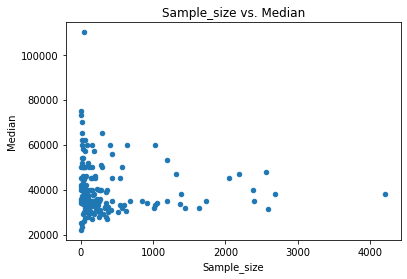

In [10]:
recent_grads.plot(x="Sample_size", y="Median", kind='scatter', title="Sample_size vs. Median")

What I understand from this scatter plot is that the popular majors tends to have an average income, while the not so popular onces might reach to incomes as high as 80000.

`Sample_size` and `Unemployment_rate` relation:


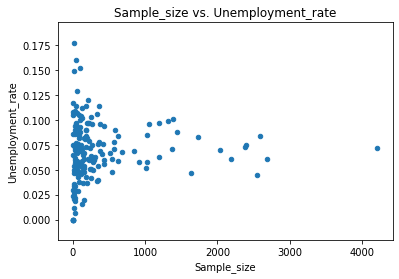

In [11]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind='scatter', title="Sample_size vs. Unemployment_rate")

On the other hand the relation between the popularity of the major and the unempoyement rate seems to picture a similar correlation. The most popular majors has an average unemployement rate. 

`Full_time` and `Median` relation: 

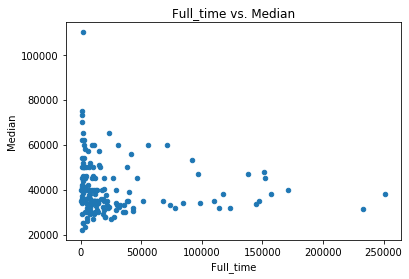

In [12]:
recent_grads.plot(x="Full_time", y="Median", kind='scatter', title="Full_time vs. Median")

`ShareWomen` and `Unemployment_rate` relation: 

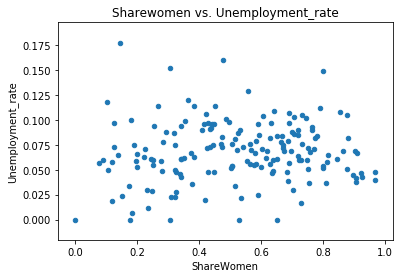

In [5]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind='scatter', title="Sharewomen vs. Unemployment_rate")

From this plot, I cannot say that there is an evident correlation between the unemployement rate and womenshare. <br> Let's see if there is a difference between the men and womens incomes:

`Men` and `Median` relation: 

(-10000, 200000)

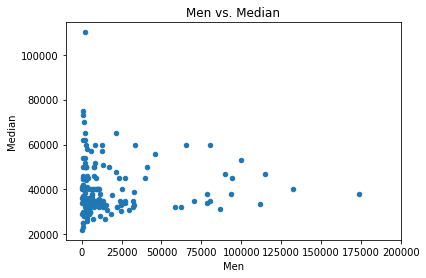

In [33]:
recent_grads.plot(x="Men", y="Median", kind='scatter', title="Men vs. Median")
plt.xlim(-10000, 200000) #setting  same limit to compare easily 

And finally generating a scatter plot to explore `Women` and `Median` relation: 

(-10000, 200000)

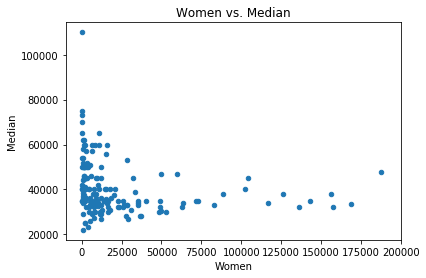

In [32]:
recent_grads.plot(x="Women", y="Median", kind='scatter', title="Women vs. Median")
plt.xlim(-10000, 200000) #setting  same limit to compare easily 

From these last two plot we can see a slight difference between women and men incomes. While many of the women in popular majors seem to earn around/below the average, men seem to have a higher income for both popular and not so popular majors. 
<br><br>
We will dive in deeply into the gender pay gap in the next section so for now let's move to generating histograms to understand better the distrubution between the genders. 

### Generating Histograms

Let's generate histograms to explore the distributions of the columns `Sample_size`, `Median`, `Employed`, `Full_time`, `ShareWomen`, `Unemployment_rate`, `Men`, `Women`:

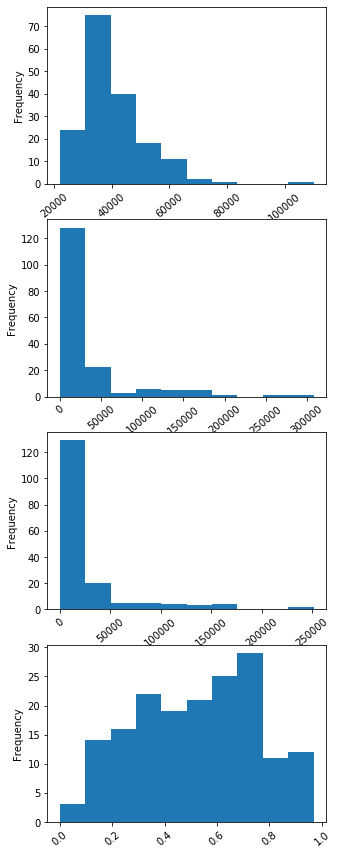

In [8]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=40)

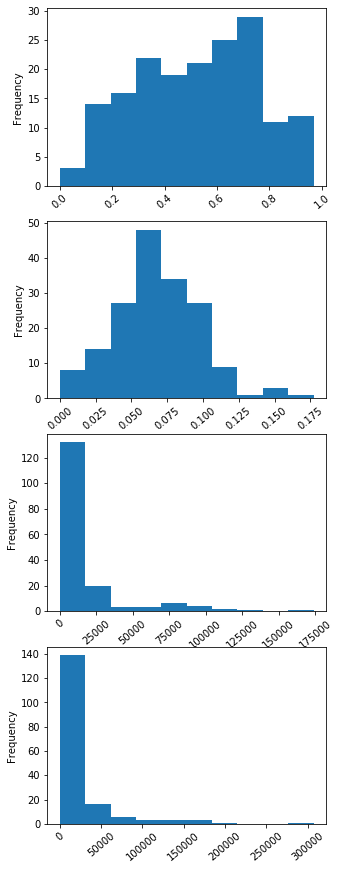

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=40)

### Generating Scatter Matrix
After generating histograms and scatter plots seperately, lets move on to the scatter matrix. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. 
<br>
<br>
Pandas contain a scatter matrix function, since it is frequently used in data analysis exploration. First I'll import the scatter_matrix() function and then choose 2 columns names from our dataset to pass into the function. 

In [15]:
from pandas.plotting import scatter_matrix  

First I am going to analyse the relation between Sample_size and Median columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4697dc5198>,
      dtype=object)

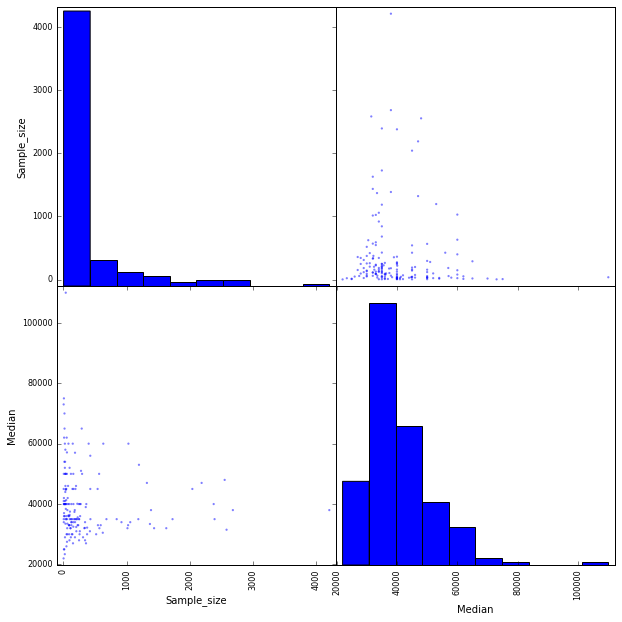

In [17]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))

Now let's add the Unemployment_rate column as well to see the correlation better.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4697be10b8>,
      dtype=object)

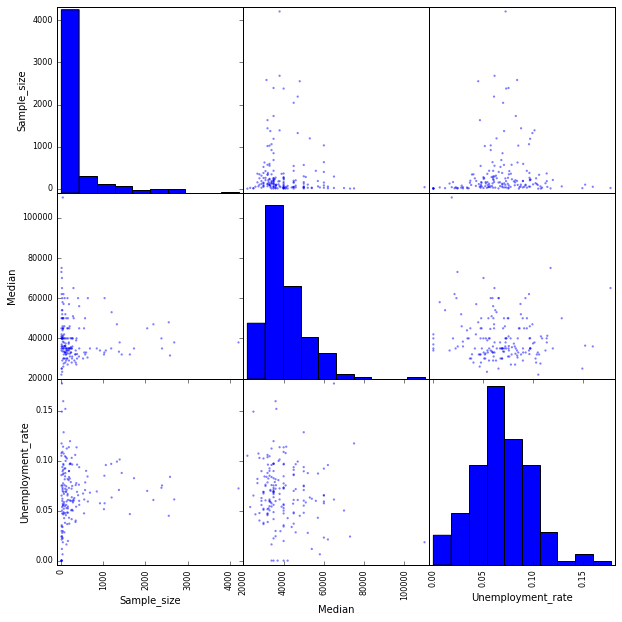

In [19]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

### Generating Bar Plots 

I will use bar plots to compare the percentages of women from the first ten rows and last ten rows of the recent_grads dataframe to have an idea of the women share in the majors.

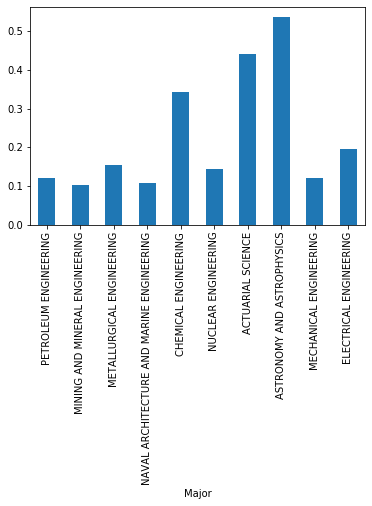

In [43]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

As we can easily see in the first 10 most earning majors, women don't have a big share. It hardly reaches to half only for one major: Astronomy and Astrophysics. Let's see the situation in the bottom of the dataset. 

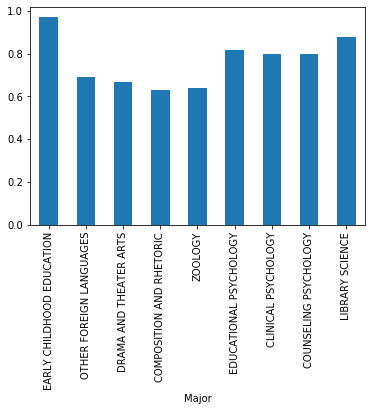

In [45]:
recent_grads[163:].plot.bar(x="Major", y='ShareWomen', legend=False)

On the contrary to the head of the dataset, women share in the bottom of the dataset is Significantly high. This show us while the well-paid jobs have majority of men,the lowest paid jobs has the majority of women share.
<br>
<br>
Let's take a look at the situation from the unempoyment point of view.

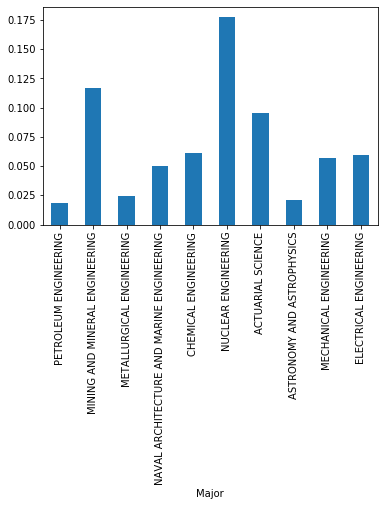

In [40]:
recent_grads[:10].plot.bar(x="Major", y='Unemployment_rate', legend=False)

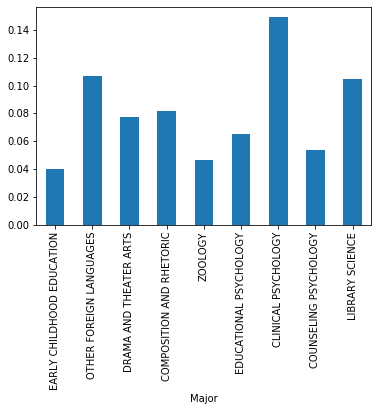

In [47]:
recent_grads[163:].plot.bar(x="Major", y='Unemployment_rate', legend=False)

From the bar plots above, we understand that the highest payed jobs has very low unemployment rates, as low as 0.02,  while the lowest paid job seem to have a higher unemployement rate, as high as 0.15. 